# Neural Networks using Keras

- Most *object detection/labeling/segmentation/classification* tasks now have
  neural network equivalent algorithms that perform on-par with or better than
  hand-crafted methods.
- One library that gives Python users particularly easy access to deep learning is Keras: https://github.com/fchollet/keras/tree/master/examples (it works with both Theano and TensorFlow).

### Configurations

From http://www.asimovinstitute.org/neural-network-zoo/:

<img src="neuralnetworks.png" style="width: 80%"/>

### Preliminary: Installing Keras

Generic instructions to install Keras with TensorFlow can be found here:
- https://keras.io/#installation
- https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/

If you use Anaconda, you can replace the `pip` installer with `conda`, although both should work. You should already have: `numpy scipy scikit-learn scikit-image pillow h5py` installed. Keras and tensorflow are available from conda-forge for the major systems/OS:
```
conda install -c conda-forge tensorflow
conda install -c conda-forge keras
conda install -c conda-forge graphviz pydot
```

Test if installation was successfull in python:
```
Python 3.5.1 |Continuum Analytics, Inc.| (default, Jun 15 2016, 16:14:02) 
...

In [1]: import keras
Using TensorFlow backend.
W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
...
In [2]: 
```
You can ignore such warnings, these simply indicate that the base library for tensorflow was installed, which will work just fine, maybe not as fast as it could be. You may want to install the GPU version `tensorflow-gpu`, much faster, but will require some tuning specific to your system. If a GPU version is installed, Keras should normally use it automatically.
- https://www.tensorflow.org/install/
- MacOS support has been dropped recently, workaround: https://stackoverflow.com/questions/44744737/tensorflow-mac-os-gpu-support
- Windows: http://inmachineswetrust.com/posts/deep-learning-setup/ and https://blog.paperspace.com/running-tensorflow-on-windows/


In the Keras docs, you may read about `image_data_format`.  By default, this is `channels-last`, which is
compatible with scikit-image's storage of `(row, cols, ch)` and the most efficient when using TensorFlow. Check your config `~/.keras/keras.json`, which should look like:
```
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "floatx": "float32"
}
```

In [3]:
# Test your installation:
import tensorflow
import keras
import pydot

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Keras basics

In this section, we apply a simple NN to simple 2D data to introduce the basic elements of Keras:
- Creating a neural-network model
- Training it and evaluating the accuracy
- Plotting the learning curves

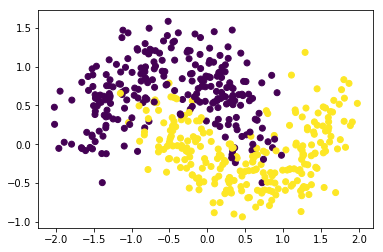

In [192]:
## Generate dummy data with some structure
from sklearn import datasets
from sklearn.model_selection import train_test_split

# X, y = datasets.make_classification(n_features=2, n_samples=200, n_redundant=0, n_informative=1,
#                                     n_clusters_per_class=1, random_state=42, class_sep=1.0)

X, y = datasets.make_moons(n_samples=500, noise=0.25)
X[:,0]-=0.5 # Center the moons

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#X_test[:,1]+=15

plt.scatter(X[:,0],X[:,1], c=y)
#plt.plot(X_train[:,0],X_train[:,1], 'r.', markersize=1)
#plt.plot(X_test[:,0],X_test[:,1], 'b.', markersize=1)

In [193]:
# Create a Neural Network with two hidden layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer

N=64

model = Sequential()
model.add(InputLayer(input_shape=[2]))
model.add(Dense(N, activation='relu'))
model.add(Dense(N, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
#model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_125 (InputLayer)                       (None, 2)                               0              
____________________________________________________________________________________________________
dense_338 (Dense)                            (None, 64)                              192            
____________________________________________________________________________________________________
dense_339 (Dense)                            (None, 64)                              4160           
____________________________________________________________________________________________________
dense_340 (Dense)                            (None, 1)                               65             
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_______________________

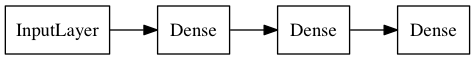

In [194]:
model.summary(line_length=100)

# Visualize the network
from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot # need pydot and graphviz packages

Image(model_to_dot(model,rankdir='LR',show_layer_names=False, show_shapes=False).create(prog='dot', format='png'))
#SVG(model_to_dot(model,rankdir='LR',show_layer_names=False).create(prog='dot', format='svg'))
#plot_model(model, to_file='model.png') # Save to an image file

In [195]:
# Train the network
epochs=100
history = model.fit(X_train, y_train, epochs=epochs,
          batch_size=100, validation_data=(X_test,y_test),verbose=1)
score = model.evaluate(X_test, y_test)

print('\n\nAccuracy:', score[1])
score

Train on 250 samples, validate on 250 samples
Epoch 1/100
250/250 [==============================] - 4s 16ms/step - loss: 0.6617 - acc: 0.7560 - val_loss: 0.6273 - val_acc: 0.7800
Epoch 2/100
250/250 [==============================] - 0s 54us/step - loss: 0.6006 - acc: 0.8440 - val_loss: 0.5934 - val_acc: 0.7800
Epoch 3/100
250/250 [==============================] - 0s 49us/step - loss: 0.5603 - acc: 0.8440 - val_loss: 0.5654 - val_acc: 0.7800
Epoch 4/100
250/250 [==============================] - 0s 48us/step - loss: 0.5264 - acc: 0.8480 - val_loss: 0.5413 - val_acc: 0.7800
Epoch 5/100
250/250 [==============================] - 0s 55us/step - loss: 0.4971 - acc: 0.8480 - val_loss: 0.5212 - val_acc: 0.7800
Epoch 6/100
250/250 [==============================] - 0s 50us/step - loss: 0.4712 - acc: 0.8520 - val_loss: 0.5043 - val_acc: 0.7760
Epoch 7/100
250/250 [==============================] - 0s 54us/step - loss: 0.4485 - acc: 0.8520 - val_loss: 0.4875 - val_acc: 0.7760
Epoch 8/100
250/

Epoch 61/100
250/250 [==============================] - 0s 53us/step - loss: 0.2080 - acc: 0.9240 - val_loss: 0.3128 - val_acc: 0.8560
Epoch 62/100
250/250 [==============================] - 0s 66us/step - loss: 0.2053 - acc: 0.9240 - val_loss: 0.3159 - val_acc: 0.8520
Epoch 63/100
250/250 [==============================] - 0s 61us/step - loss: 0.2030 - acc: 0.9240 - val_loss: 0.3118 - val_acc: 0.8520
Epoch 64/100
250/250 [==============================] - 0s 56us/step - loss: 0.2006 - acc: 0.9240 - val_loss: 0.3113 - val_acc: 0.8520
Epoch 65/100
250/250 [==============================] - 0s 61us/step - loss: 0.1998 - acc: 0.9240 - val_loss: 0.3112 - val_acc: 0.8560
Epoch 66/100
250/250 [==============================] - 0s 56us/step - loss: 0.1981 - acc: 0.9240 - val_loss: 0.3182 - val_acc: 0.8600
Epoch 67/100
250/250 [==============================] - 0s 48us/step - loss: 0.1965 - acc: 0.9280 - val_loss: 0.3157 - val_acc: 0.8640
Epoch 68/100
250/250 [==============================] -

[0.2463931860923767, 0.89600000095367427]

### Plotting learning curve

In [196]:
def plot_history(history):
    epochs = len(history.history['acc'])
    fig,axes = plt.subplots(1,2,figsize=(12,4))
    ticks=range(1,epochs+1)
    axes[0].plot(ticks,history.history['acc'], label='train')
    axes[0].plot(ticks,history.history['val_acc'], label='test')
    axes[0].legend()
    axes[0].set_title('accuracy')
    axes[0].set_xlabel('epochs')
    axes[1].plot(ticks,history.history['loss'], label='train')
    axes[1].plot(ticks,history.history['val_loss'], label='test')
    axes[1].legend()
    axes[1].set_title('loss')
    axes[1].set_xlabel('epochs')
    #plt.xticks(range(0,nepochs,5));

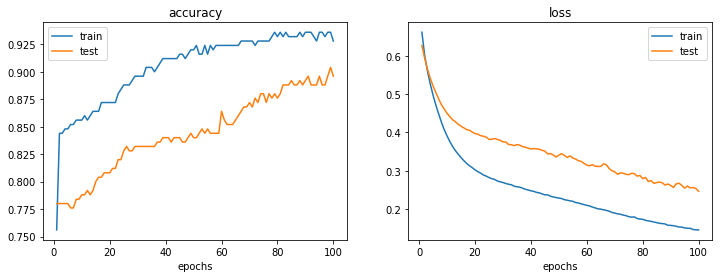

In [197]:
plot_history(history)

For simple problems, classifiers such as random forests can actually provide same or better performance faster than neural networks. Let's see with more challenging problem in next section.

### Debugging the decision function (in 2D)

In [198]:
# Visualize the decision function

def plot_2d_decision(model, X, y):
    assert X.shape[1]==2, 'X should have 2 columns, got {}'.format(X.shape[1])
    
    # Generate a 2D grid of input samples
    B=np.max(X)*1.1
    gridy, gridx = np.mgrid[-B:B:100j,-B:B:100j]
    X_grid = np.concatenate((gridx.reshape(-1,1),gridy.reshape(-1,1)),axis=1)

    # Apply the network to this input
    out = model.predict(X_grid)
    out_im = out.reshape(gridx.shape)
    
    # Visualize the result overlayed with the dataset
    plt.imshow(out_im, extent=(-B,B,B,-B), cmap='gray')
    plt.contour(out_im, levels=[0.5], colors=['r'], extent=(-B,B,-B,B))
    plt.scatter(X[:,0],X[:,1], c=y, marker='.')

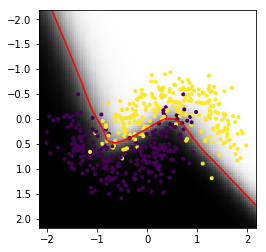

In [199]:
plot_2d_decision(model, X, y)

### Evaluating the meta-parameters (number of nodes, layers...)

In [200]:
# Function that evaluates a network created according to meta-parameters 
def evaluate_perf(N=64, hidden=2, epochs=50):
    print('evaluate_perf: N={}, hidden={}...'.format(N, hidden))
    
    model = Sequential()
    model.add(InputLayer(input_shape=[2]))
    for i in range(hidden):
        model.add(Dense(N, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epochs,
              batch_size=100, verbose=0, validation_data=(X_test, y_test))
    loss, acc = model.evaluate(X_test, y_test)
    
    print('  accuracy={:.3f}'.format(acc))
    plot_2d_decision(model, X, y)
    
    plt.title('N={}, h={}: acc={:.3f}'.format(N, hidden, acc))
    
    perf = {'acc':acc, 'history':history}
    
    return perf

evaluate_perf: N=256, hidden=4...
250/250 [==============================] - 0s 68us/step
  accuracy=0.912


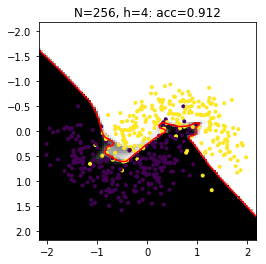

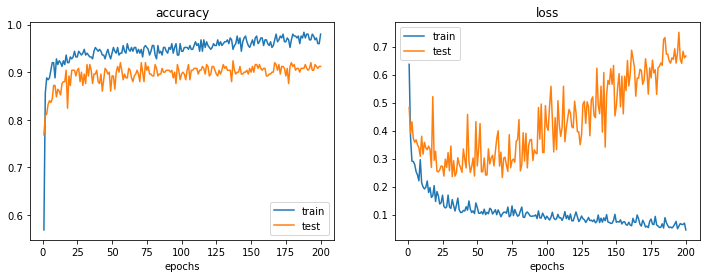

In [201]:
# Illustration of over-fitting: too many parameters
perf = evaluate_perf(N=256, hidden=4, epochs=200)
fig = plt.figure()
plot_history(perf['history']);

evaluate_perf: N=16, hidden=0...
250/250 [==============================] - 0s 40us/step
  accuracy=0.780
evaluate_perf: N=16, hidden=1...
250/250 [==============================] - 0s 38us/step
  accuracy=0.812
evaluate_perf: N=16, hidden=2...
250/250 [==============================] - 0s 42us/step
  accuracy=0.844
evaluate_perf: N=16, hidden=3...
250/250 [==============================] - 0s 44us/step
  accuracy=0.864
evaluate_perf: N=64, hidden=0...
250/250 [==============================] - 0s 42us/step
  accuracy=0.208
evaluate_perf: N=64, hidden=1...
250/250 [==============================] - 0s 44us/step
  accuracy=0.836
evaluate_perf: N=64, hidden=2...
250/250 [==============================] - 0s 47us/step
  accuracy=0.892
evaluate_perf: N=64, hidden=3...
250/250 [==============================] - 0s 58us/step
  accuracy=0.908


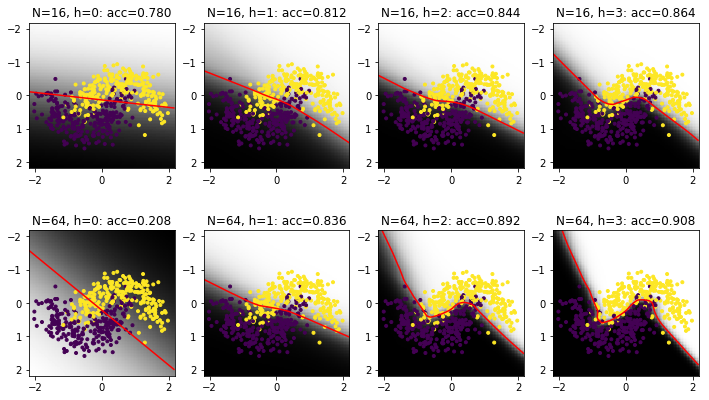

In [206]:
params=[(16,0),(16,1),(16,2),(16,3),
        (64,0),(64,1),(64,2),(64,3)]
nx=4
ny=(len(params)+nx-1)//nx

acc_array = np.zeros(len(params))
fig,axes = plt.subplots(ny,nx,figsize=(12,7))
axes=axes.ravel()
for i,(N,h) in enumerate(params):
    plt.sca(axes[i])
    perf = evaluate_perf(N,h, 100)
    acc_array[i] = perf['acc']

Text(0.5,0,'(nb_units,nb_layers)')

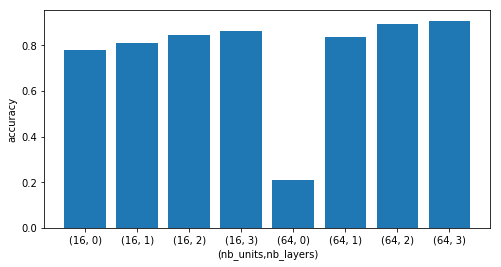

In [208]:
fig2 = plt.figure(figsize=(8,4))
plt.bar(range(len(params)),acc_array, tick_label=[str(p) for p in params])
plt.ylabel('accuracy')
plt.xlabel('(nb_units,nb_layers)')

### Comparing to `sklearn` classifiers

In [204]:
def plot_history_compare(history, acc_dict):
    """
    Plot NN fit history (test accuracy) and overlay fixed accuracy from other classifier
    
    history: output of model.fit()
    acc_dict: dictionnary of the form {'approach_name': accuracy, ...}
    """
    epochs = len(history.history['acc'])
    
    plt.plot([],[],label='_nolegend_')
    
    ticks=range(1,epochs+1)
    plt.plot(ticks,history.history['val_acc'], label='test')
    plt.legend()
    plt.title('accuracy')
    plt.xlabel('epochs')
    
    epochs = len(history.history['acc'])
    for label in acc_dict:
        acc = acc_dict[label]
        plt.gcf().axes[0].plot([0,epochs],[acc,acc], ":")
    plt.gcf().axes[0].legend(['NN test'] + list(acc_dict.keys()))

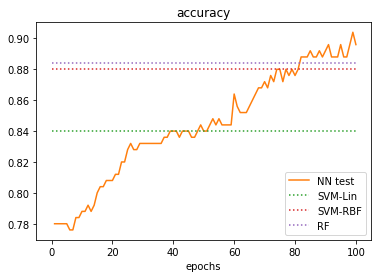

In [205]:
# Compare to RandomForest and SVM

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import OrderedDict

perfs=OrderedDict()

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
perfs['SVM-Lin'] = svm.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
perfs['SVM-RBF'] = svm.score(X_test, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
perfs['RF'] = rf.score(X_test, y_test)

plot_history_compare(history, perfs)

## Simple CNN for object recognition

When dealing with images, Convolutional Neural Network offer the advantage of computing visual features from the image using Convolutional Layers, which can be trained at the same time as the dense layers that perform the classification.

In this section, we use the Fashion-MNIST dataset to recognize pieces of clothes shown as 28x28 pixel gray-scale images. 

Dataset from https://github.com/zalandoresearch/fashion-mnist. The training set contains 60,000 samples and the test set 10,000 samples. Each training and test example is assigned to one of the following labels:
```
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot 
```

In [155]:
from keras.datasets import fashion_mnist, mnist
from keras.utils import np_utils

data=fashion_mnist.load_data()
# Download will be done only once:
# By default, the dataset will be cached inside ~/.keras/datasets/

#data=mnist.load_data() # Uncomment to use original MNIST instead

((X_train,y_train),(X_test,y_test))=data

# To go faster, reduce the amount of training data
X_train=X_train[:2500]
y_train=y_train[:2500]

# Prepare datasets
# This step contains normalization and reshaping of input.
# For output, it is important to change number to one-hot vector. 
X_train = X_train.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

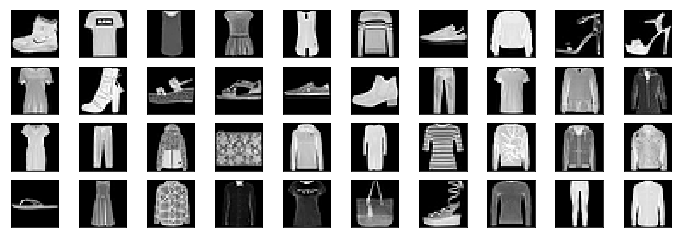

In [156]:
fig,axes = plt.subplots(4,10, figsize=(12,4))
axes=axes.ravel()
for i in range(len(axes)):
    axes[i].imshow(X_train[i,0,:,:], cmap='gray')
    axes[i].set_xticks([]); axes[i].set_yticks([])
#a.set_xtick(None)

In [157]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, BatchNormalization, Conv2D, MaxPool2D, Flatten
from keras.initializers import Constant

model = Sequential()
model.add(InputLayer(input_shape=(1, 28, 28)))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), 
        padding='same', 
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform'
    ))
model.add(MaxPool2D(padding='same'))
model.add(Conv2D(32, (2, 2), 
        padding='same', 
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform', 
        input_shape=(1, 28, 28)
    ))
model.add(MaxPool2D(padding='same'))
model.add(Flatten())
model.add(Dense(128,
        activation='relu',
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform',         
    ))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_120 (InputLayer)       (None, 1, 28, 28)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 32)         4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
__________

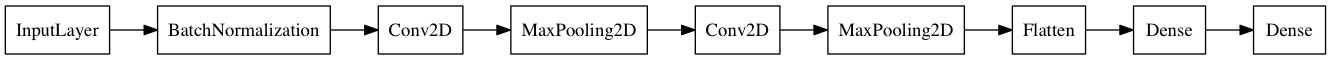

In [163]:
model.summary()

from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot # need pydot and graphviz packages

Image(model_to_dot(model,rankdir='LR',show_layer_names=False).create(prog='dot', format='png'))

In [159]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=100, 
    validation_data=(X_test, y_test),
    verbose=1,
)
model.evaluate(X_test,y_test)

Train on 2500 samples, validate on 10000 samples
Epoch 1/20
2500/2500 [==============================] - 3s 1ms/step - loss: 1.6851 - acc: 0.4884 - val_loss: 1.7507 - val_acc: 0.2689
Epoch 2/20
2500/2500 [==============================] - 1s 212us/step - loss: 0.9128 - acc: 0.6636 - val_loss: 1.5119 - val_acc: 0.4092
Epoch 3/20
2500/2500 [==============================] - 1s 211us/step - loss: 0.7357 - acc: 0.7276 - val_loss: 1.1784 - val_acc: 0.6175
Epoch 4/20
2500/2500 [==============================] - 1s 208us/step - loss: 0.6314 - acc: 0.7704 - val_loss: 0.9597 - val_acc: 0.7092
Epoch 5/20
2500/2500 [==============================] - 1s 221us/step - loss: 0.5740 - acc: 0.7980 - val_loss: 0.8454 - val_acc: 0.7315
Epoch 6/20
2500/2500 [==============================] - 1s 215us/step - loss: 0.5446 - acc: 0.8024 - val_loss: 0.7879 - val_acc: 0.7435
Epoch 7/20
2500/2500 [==============================] - 1s 217us/step - loss: 0.5015 - acc: 0.8220 - val_loss: 0.6694 - val_acc: 0.7760
E

[0.5192161620616913, 0.82699999999999996]

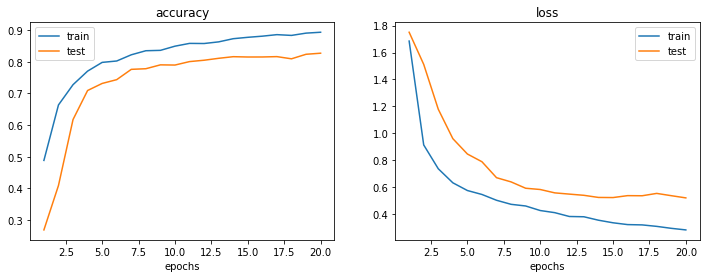

In [160]:
plot_history(history)

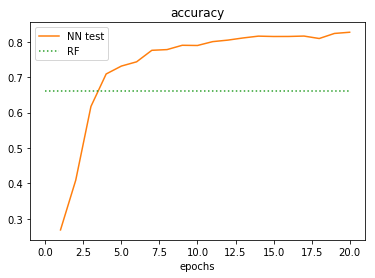

In [161]:
# Compare to RandomForest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train.reshape((X_train.shape[0],-1)), y_train)
acc=rf.score(X_test.reshape((X_test.shape[0],-1)), y_test)

plot_history_compare(history, {'RF':acc})

It is clear that CNN outperform RF on this dataset. Their architecture is better at extracting the relevant information from the image compared to passing the raw image data to the random forest. Improving the performance of the RF would require designing better features to be fed to the RF classifier, which the CNN includes in the first layers.

## Object recognition using Inception-v3

In this section, we use the pre-trained model Inception-v3 for object recognition.

<img width="600px" src="inception_v3_architecture.png"/>


In [164]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

# Loading the pre-trained model 
# (takes a few seconds, may need downloading the first time)
net = InceptionV3()

In [167]:
if False: # Change to true to display Inception structure (very large)
    net.summary(line_length=100, positions=[0.35,0.65,0.7,1.0])
    Image(model_to_dot(net,rankdir='TB',show_layer_names=False).create(prog='dot', format='png'))

In [168]:
from skimage import transform

def inception_predict(image):
    # Rescale image to 299x299, as required by InceptionV3
    image_prep = transform.resize(image, (299, 299, 3), mode='reflect')
    
    # Scale image values to [-1, 1], as required by InceptionV3
    image_prep = (img_as_float(image_prep) - 0.5) * 2
    
    predictions = decode_predictions(
        net.predict(image_prep[None, ...])
    )
    
    plt.imshow(image, cmap='gray')
    
    for pred in predictions[0]:
        (n, klass, prob) = pred
        print('{klass:>15} ({prob:.3f})'.format(klass=klass, prob=prob))

   Egyptian_cat (0.897)
          tabby (0.056)
      tiger_cat (0.039)
           lynx (0.000)
    plastic_bag (0.000)


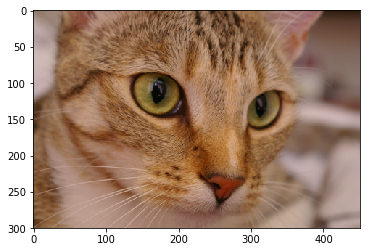

In [169]:
from skimage import data, img_as_float
inception_predict(data.chelsea())

         tripod (0.929)
         crutch (0.002)
     binoculars (0.002)
  reflex_camera (0.001)
      overskirt (0.000)


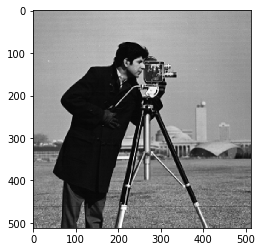

In [170]:
inception_predict(data.camera())

       espresso (0.984)
            cup (0.001)
     coffee_mug (0.001)
         eggnog (0.001)
 espresso_maker (0.001)


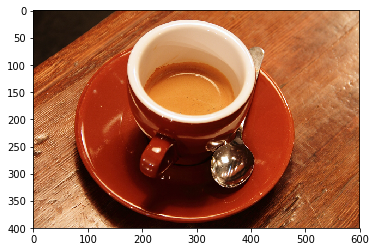

In [171]:
inception_predict(data.coffee())

          moped (0.700)
  motor_scooter (0.186)
     disk_brake (0.049)
   crash_helmet (0.004)
      car_wheel (0.001)


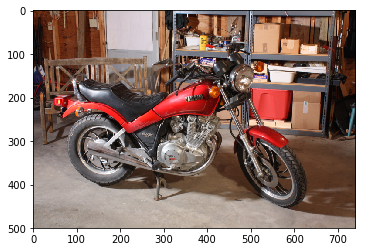

In [172]:
inception_predict(data.stereo_motorcycle()[1])

You can fine-tune Inception to classify your own classes, as described at

https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes

---

Extra topics:
- Many examples provided with Keras (ResNet, OCR, AutoEncoders, ...): https://github.com/fchollet/keras/tree/master/examples
- Using Keras as a Scikit-learn classifier: https://keras.io/scikit-learn-api/

### ResNet for object recognition

We can also try ResNet, which is included in Keras distribution.

In [174]:
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50

# Loading the pre-trained model 
# (may take a few minutes to download for the first time)
resnet = ResNet50()

In [175]:
if False:
    resnet.summary()
    Image(model_to_dot(resnet,rankdir='TB',show_layer_names=False).create(prog='dot', format='png'))

In [176]:
def resnet_predict(image):
    # Rescale image to 224x224, as required by ResNet50
    image_prep = transform.resize(image, (224, 224, 3), mode='reflect')
    
    # Scale image values to [-128, 128]
    image_prep = img_as_float(image_prep)*256 - 128
    
    predictions = resnet50.decode_predictions(
        resnet.predict(image_prep[None, ...])
    )
    
    plt.imshow(image, cmap='gray')
    
    for pred in predictions[0]:
        (n, klass, prob) = pred
        print('{klass:>15} ({prob:.3f})'.format(klass=klass, prob=prob))

   Egyptian_cat (0.993)
      tiger_cat (0.002)
          tabby (0.002)
           lynx (0.002)
   snow_leopard (0.001)


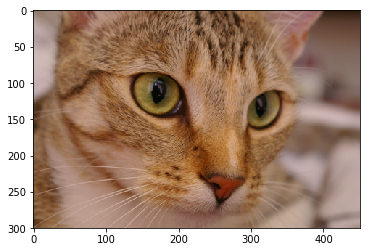

In [177]:
resnet_predict(data.chelsea())

         tripod (0.996)
  reflex_camera (0.002)
     binoculars (0.001)
         crutch (0.000)
      harmonica (0.000)


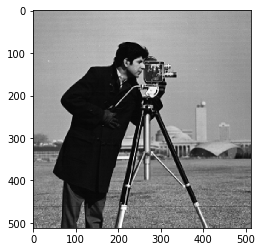

In [510]:
resnet_predict(data.camera())

       espresso (0.453)
            cup (0.084)
           tray (0.069)
      water_jug (0.032)
       milk_can (0.028)


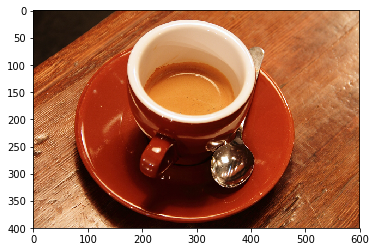

In [511]:
resnet_predict(data.coffee())

          moped (0.594)
  motor_scooter (0.308)
        Model_T (0.052)
       tricycle (0.022)
   crash_helmet (0.010)


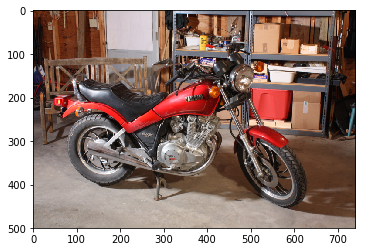

In [513]:
resnet_predict(data.stereo_motorcycle()[1])

        obelisk (0.614)
          crane (0.144)
           pole (0.078)
drilling_platform (0.035)
     totem_pole (0.029)


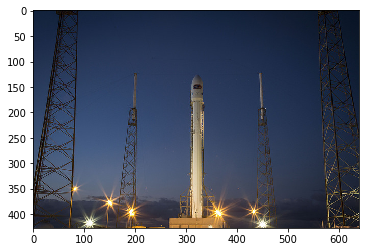

In [184]:
resnet_predict(data.rocket())